# Set up

In [1]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

  Cloning https://github.com/facebookresearch/detectron2.git to /private/var/folders/2_/nk9j6sb901n_fk5dz_9vtqj80000gn/T/pip-req-build-4b51di_j
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /private/var/folders/2_/nk9j6sb901n_fk5dz_9vtqj80000gn/T/pip-req-build-4b51di_j
  Resolved https://github.com/facebookresearch/detectron2.git to commit 7c2c8fb168a2093ce06a531c1208fba48d2984ec
  Preparing metadata (setup.py) ... done
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html


In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

zsh:1: command not found: nvcc
torch:  1.12 ; cuda:  1.12.1
detectron2: 0.6


# Import

In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

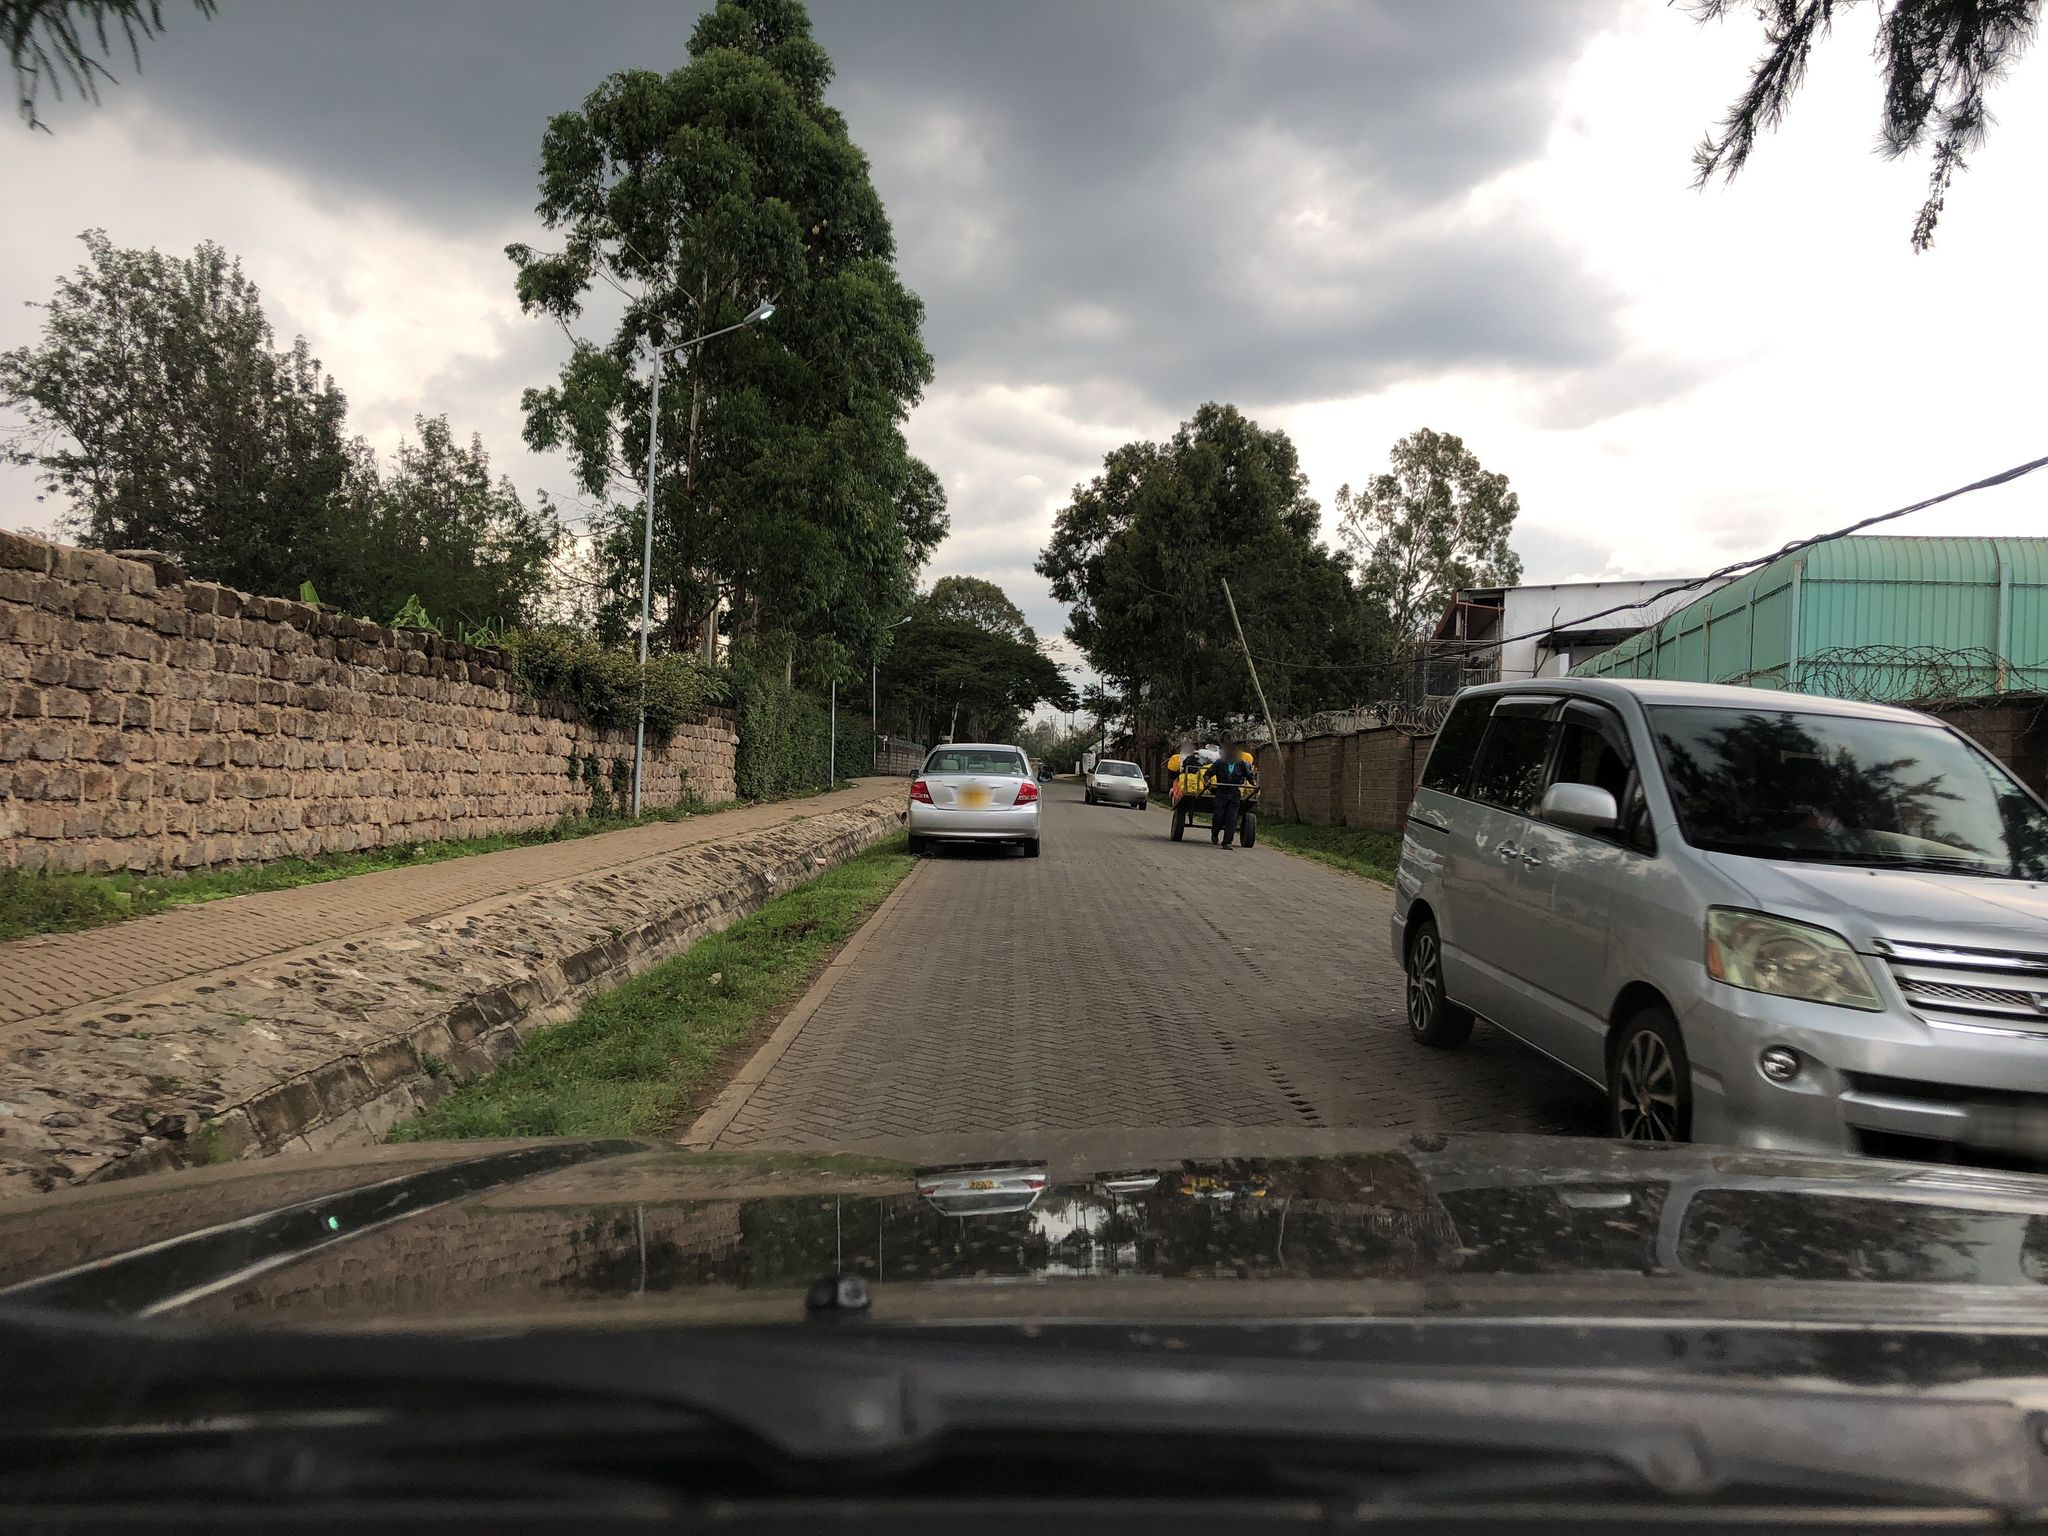

In [25]:

from IPython.display import Image
img = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Mapillary/Image/Used/3596197417273019.jpg'
im = cv2.imread(img)
Image(filename = img) 

In [3]:
im.shape

(1536, 2048, 3)

In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library

cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
cfg.MODEL.DEVICE = 'cpu' #  Game Changer!!!!!!!!!
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

/opt/miniconda3/envs/Try/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1659484612588/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# Get Image

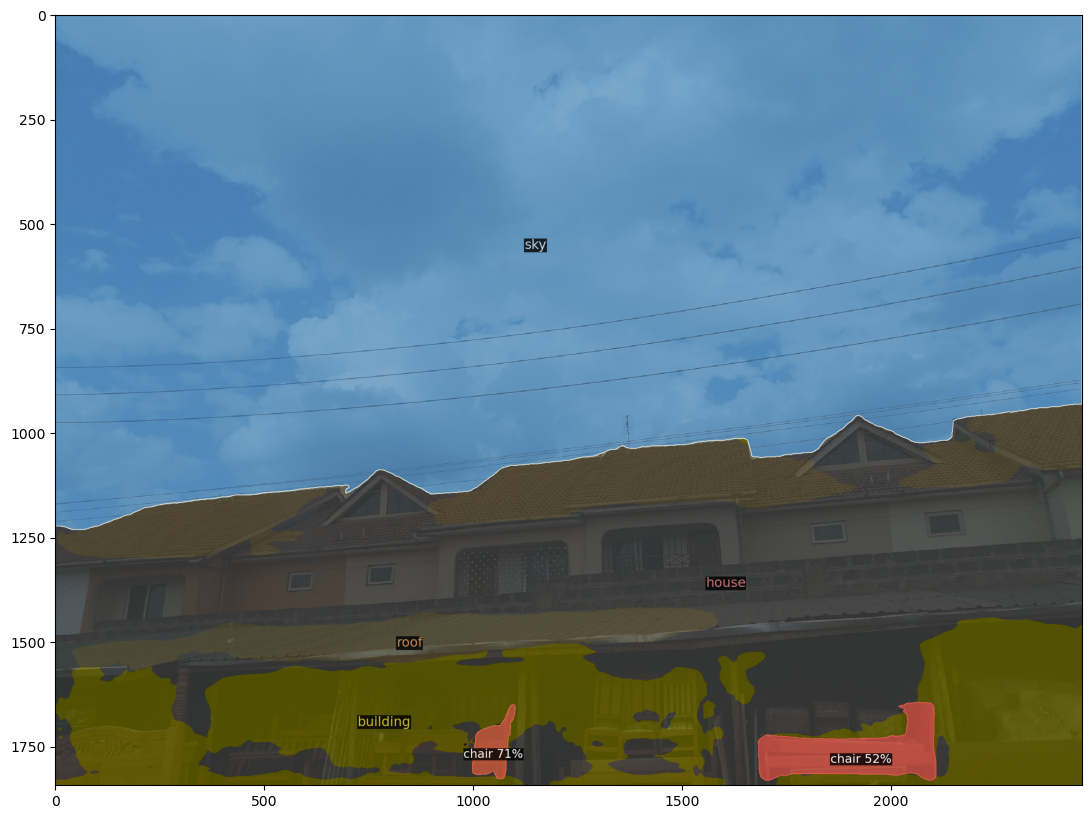

In [24]:
# Show img below
import matplotlib.pyplot as plt

panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

plt.figure(figsize=(14,10))
plt.imshow(v.get_image())
plt.show()

# https://stackoverflow.com/questions/71717980/in-detectron2-there-are-class-ids-instead-of-class-names

In [ ]:
# Show img in a new Tab
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2.imshow('Result', out.get_image()[:, :, ::-1])
cv2.waitKey(0)

# Get Output

In [6]:
# https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
# print(outputs["instances"].pred_boxes)

tensor([37, 37, 37])


In [82]:
outputs['panoptic_seg'][1]

[{'id': 1,
  'isthing': True,
  'score': 0.9727214574813843,
  'category_id': 7,
  'instance_id': 0},
 {'id': 2,
  'isthing': True,
  'score': 0.8857269287109375,
  'category_id': 0,
  'instance_id': 1},
 {'id': 3,
  'isthing': True,
  'score': 0.615877091884613,
  'category_id': 11,
  'instance_id': 2},
 {'id': 4, 'isthing': False, 'category_id': 37, 'area': 1144892},
 {'id': 5, 'isthing': False, 'category_id': 40, 'area': 1508766},
 {'id': 6, 'isthing': False, 'category_id': 50, 'area': 365341},
 {'id': 7, 'isthing': False, 'category_id': 52, 'area': 30763}]

In [83]:
# Test
OutClass = outputs['panoptic_seg'][1]

# Get Ouput
ListID = []
ListClass = []

# os.rename(img, ImgDestin + str(id) + '.jpg')


for element in OutClass:
    # print(len(element))
    # print(type(element))
    ID = element['id']
    CategoryId = element['category_id']
    if 'instance_id' in element:
        InstanceId = element['instance_id']
        print(str(InstanceId) + str('exist') )
        ColumnName = str('Instance' + str(CategoryId))
    else:
        print('no instance_id')
        continue
        ColumnName = str('Class' + str(CategoryId))
    print(ID)

0exist
1
1exist
2
2exist
3
no instance_id
no instance_id
no instance_id
no instance_id


In [84]:
instances = outputs["instances"]
detected_class_indexes = instances.pred_classes
prediction_boxes = instances.pred_boxes
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
class_catalog = metadata.thing_classes

for idx, coordinates in enumerate(prediction_boxes):
    class_index = detected_class_indexes[idx]
    class_name = class_catalog[class_index]
    print(class_name, coordinates)
    
# https://stackoverflow.com/questions/67516185/in-detectron-2-how-could-i-get-detected-object-class-name-and-the-bounding-box-x

truck tensor([1079.1937, 1304.2333, 1394.2500, 1529.4243])
person tensor([1089.4075, 1439.7437, 1162.2531, 1532.8014])
stop sign tensor([703.3419, 503.3102, 810.9307, 894.7728])
person tensor([1160.4945, 1489.9384, 1232.1072, 1536.0000])
person tensor([1097.4553, 1437.1866, 1119.8083, 1485.4811])
person tensor([1115.2040, 1459.9663, 1236.5142, 1536.0000])
car tensor([1175.1400, 1308.4945, 1388.6663, 1534.6964])
truck tensor([1334.4036, 1301.9917, 1619.9877, 1527.6952])
person tensor([1092.4818, 1444.1790, 1111.2750, 1498.0046])


In [85]:
from detectron2.data import MetadataCatalog
MetadataCatalog.get("my_dataset").thing_classes = ["person", "dog"]

https://github.com/cocodataset/panopticapi/blob/master/panoptic_coco_categories.json    
https://mmdetection.readthedocs.io/en/v2.19.0/_modules/mmdet/datasets/coco_panoptic.html  
File: /opt/miniconda3/envs/Try/lib/python3.10/site-packages/detectron2/data/datasets/builtin_meta.py


# Get Text

In [75]:
OutClass = outputs['panoptic_seg'][1]
ListID = []
ListClass = []
for element in OutClass:
    print(element)
#     print(type(element))
    ID = element['id']
    CategoryId = element['category_id']
    ListID.append(ID)
    ListClass.append(CategoryId)

{'id': 1, 'isthing': True, 'score': 0.9962427616119385, 'category_id': 2, 'instance_id': 0}
{'id': 2, 'isthing': True, 'score': 0.9941222071647644, 'category_id': 2, 'instance_id': 1}
{'id': 3, 'isthing': True, 'score': 0.9922290444374084, 'category_id': 2, 'instance_id': 2}
{'id': 4, 'isthing': True, 'score': 0.9909777641296387, 'category_id': 2, 'instance_id': 3}
{'id': 5, 'isthing': True, 'score': 0.9865222573280334, 'category_id': 0, 'instance_id': 4}
{'id': 6, 'isthing': True, 'score': 0.9828482866287231, 'category_id': 0, 'instance_id': 5}
{'id': 7, 'isthing': True, 'score': 0.9741486310958862, 'category_id': 0, 'instance_id': 6}
{'id': 8, 'isthing': True, 'score': 0.9692283272743225, 'category_id': 0, 'instance_id': 7}
{'id': 9, 'isthing': True, 'score': 0.949059009552002, 'category_id': 2, 'instance_id': 8}
{'id': 10, 'isthing': True, 'score': 0.7397320866584778, 'category_id': 3, 'instance_id': 9}
{'id': 11, 'isthing': True, 'score': 0.5265467762947083, 'category_id': 26, 'ins

In [13]:
ListClass

[2, 2, 2, 0, 2, 2, 2, 7, 7, 1, 21, 37, 40, 44, 46, 47, 50]

In [45]:
outputs["instances"]

Instances(num_instances=4, image_height=1152, image_width=2047, fields=[pred_boxes: Boxes(tensor([[1112.7338,  530.3188, 1522.9890,  634.3343],
        [  48.9987,  867.8086, 2047.0000, 1125.9659],
        [1093.5472,  527.2275, 1441.2021,  659.4970],
        [  72.3716,  861.2883, 2023.8302, 1122.1166]])), scores: tensor([0.2719, 0.1992, 0.0622, 0.0577]), pred_classes: tensor([14,  2, 33,  1]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, Fals

In [43]:
type(outputs['panoptic_seg'])

tuple

In [14]:
outputs

{'sem_seg': tensor([[[ 2.2776,  2.2776,  2.2769,  ...,  2.1866,  2.0868,  2.0137],
          [ 2.2776,  2.2776,  2.2769,  ...,  2.1866,  2.0868,  2.0137],
          [ 2.2870,  2.2870,  2.2867,  ...,  2.2133,  2.1136,  2.0407],
          ...,
          [ 5.5977,  5.5977,  5.6083,  ...,  4.6261,  4.5207,  4.4435],
          [ 5.5467,  5.5467,  5.5569,  ...,  4.5891,  4.4901,  4.4176],
          [ 5.5093,  5.5093,  5.5193,  ...,  4.5620,  4.4677,  4.3987]],
 
         [[-0.2955, -0.2955, -0.2963,  ..., -0.3640, -0.3410, -0.3242],
          [-0.2955, -0.2955, -0.2963,  ..., -0.3640, -0.3410, -0.3242],
          [-0.2953, -0.2953, -0.2962,  ..., -0.3636, -0.3404, -0.3233],
          ...,
          [-1.3913, -1.3913, -1.3933,  ..., -1.2165, -1.1680, -1.1325],
          [-1.3457, -1.3457, -1.3476,  ..., -1.1756, -1.1304, -1.0972],
          [-1.3123, -1.3123, -1.3141,  ..., -1.1457, -1.1028, -1.0714]],
 
         [[-2.4236, -2.4236, -2.4259,  ..., -2.1317, -2.1175, -2.1071],
          [-2.423

explaination:
    https://towardsdatascience.com/understanding-detectron2-demo-bc648ea569e5